## Qual o comportamente dos dados pluviométricos com relação as solicitações?

Para analisarmos esse aspecto iremos estudar de forma exploratória os dados pluviométrico, a fim de estudar seu comportamento, e analisar o seu relacionamento com relação as informações das solicitações 156

## Import de bibliotecas

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline  

## Carregamento dos dados pluviométrico e das solicitações

In [65]:
df_156 = pd.read_hdf('../../data/processed/solicitacoes156.h5', key='data', format="table")
df_plu = pd.read_hdf('../../data/processed/pluviometrico.h5', key='data', format="table")
display(df_156.head())
display(df_plu.head())

,GRUPOSERVICO_CODIGO,GRUPOSERVICO_DESCRICAO,SERVICO_CODIGO,SERVICO_DESCRICAO,LOGRADOURO,NUMERO,BAIRRO,RPA,DATA_DEMANDA,SITUACAO,DATA_ULT_SITUACAO,ANO
0,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR PIRIZAL,3587,VASCO DA GAMA,3,2012-05-03,ATENDIDA,2012-05-03,2012
1,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,1TR SEBASTIAO GRANDE,3587,AREIAS,5,2012-05-10,ATENDIDA,2012-05-10,2012
2,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV ANTONIO DE GOES,3578,PINA,6,2012-05-11,ATENDIDA,2012-05-11,2012
3,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEBERIBE,00,AGUA FRIA,2,2012-09-12,ATENDIDA,2012-09-12,2012
4,2,CONSERVACAO,1,REMOCAO DE ANIMAIS MORTOS PEQUENOS,AV BEIRA RIO,00,MADALENA,4,2012-08-10,ATENDIDA,2012-08-10,2012


,DATA,INDICE
0,2012-04-01,33.0
1,2012-08-01,21.8
2,2012-12-01,0.0
3,2012-02-01,0.0
4,2012-01-01,0.0


## Análise sobre as médias e dispersão gerais, anuais e mensais com relação aos dados pluviométricos

Média geral de indice pluviométrico em Recife: 50.191
Desvio padrão geral de indice pluviométrico em Recife: 115.527


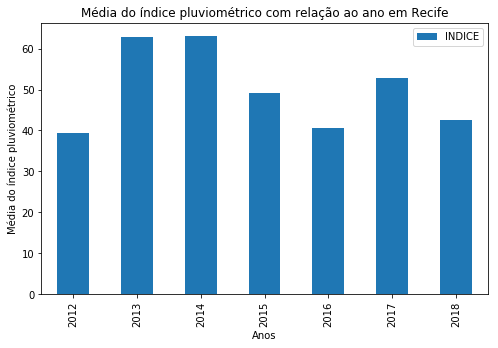

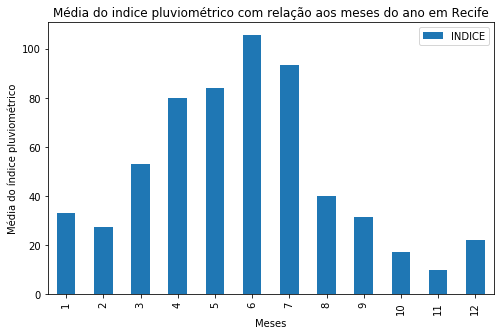

In [114]:
print('Média geral de indice pluviométrico em Recife:', round(df_plu['INDICE'].mean(), 3))
print('Desvio padrão geral de indice pluviométrico em Recife:', round(df_plu['INDICE'].std(), 3))

ax = df_plu.groupby(df_plu['DATA'].dt.year).mean().plot.bar(
    title='Média do índice pluviométrico com relação ao ano em Recife',
    #yerr=df_plu.groupby(df_plu['DATA'].dt.year).std(),
    figsize=(8, 5)
)
ax.set_ylabel('Média do índice pluviométrico')
ax.set_xlabel('Anos')

ax = df_plu.groupby([df_plu['DATA'].dt.month]).mean().plot.bar(
    title='Média do indice pluviométrico com relação aos meses do ano em Recife',
    #yerr=df_plu.groupby(df_plu['DATA'].dt.month).std(),
    figsize=(8, 5)
)
ax.set_ylabel('Média do índice pluviométrico')
aux = ax.set_xlabel('Meses')

In [112]:
df_plu.groupby(df_plu['DATA'].dt.year).mean().to_csv('../../mean_pluv_year.csv', index=False, sep=',')
df_plu.groupby(df_plu['DATA'].dt.month).mean().to_csv('../../mean_pluv_month.csv', index=False, sep=',')

## Análise sobre a distribuição dos dados pluviométrico

Histograma dos dados pluviométricos:


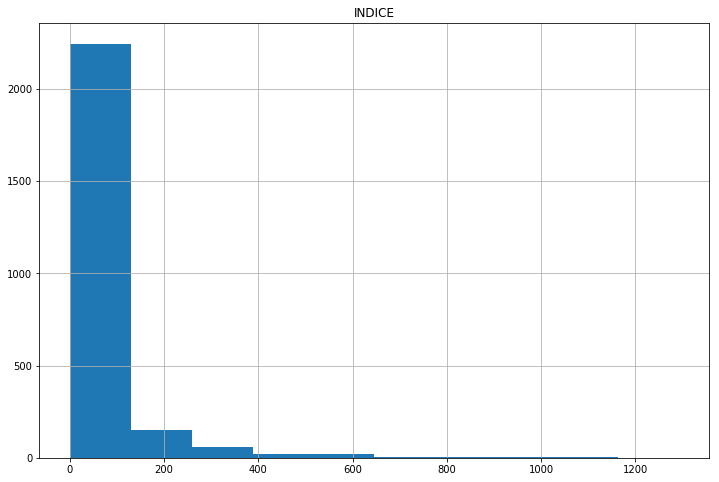

In [67]:
df_plu.hist(figsize=(12, 8))
print('Histograma dos dados pluviométricos:')

## Conclusão

Sobre os dados pluviométricos podemos concluir que em média, Recife possui um volume ponderado de chuvas, cerca de 50mm, e que esse valor tende a se preservar durante os anos, permanecendo na faixa de 40 a 60mm por ano. Observe também que com relação aos meses, Recife parece ter um período chuvoso entre e março e agosto, e um periodo com menor índice de chuvas entre setembro e fevereiro. Podemos resaltar que a dispersão é bem elevada com relação a média, apresentando diferenças significativas durante ao ano. Observe também o histograma, podemos observar uma distribuição normal, onde temos um numero elevado de entenperes leves, muito maior com relação a emtemperes moderadas e elevadas

## Análise dos dados pluviométrico com relação aos grupos de serviços

In [132]:
df_156.columns = ['GRUPOSERVICO_CODIGO', 'GRUPOSERVICO_DESCRICAO', 'SERVICO_CODIGO', 'SERVICO_DESCRICAO', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'RPA', 'DATA', 'SITUACAO', 'DATA_ULT_SITUACAO', 'ANO']
merged_df = pd.merge(left=df_156, right=df_plu, on='DATA')
groups_df = pd.get_dummies(merged_df['GRUPOSERVICO_DESCRICAO'])
concat_df = pd.concat([merged_df, groups_df], axis=1)
final_df = concat_df[['DATA', 'INDICE'] + list(groups_df.columns)].groupby('DATA')
data_df = pd.concat([final_df['INDICE'].mean(), final_df[groups_df.columns].sum()], axis=1)

In [133]:
corr_df = data_df.corr()

np.fill_diagonal(corr_df.values, 0)

new_cols = []
threshold = 0.6
cols = corr_df.columns.values
for i in range(cols.shape[0]):
    for j in range(i, cols.shape[0]):
        maximum = corr_df.iloc[i, j]
        if maximum >= threshold:
            new_cols.append(cols[i])

new_cols = list(set(new_cols))
data_corr = corr_df.loc[new_cols, new_cols]
np.fill_diagonal(data_corr.values, 0)

print('Tabela de correlações Pearson entre os grupos de serviços:')
display(data_corr)

Tabela de correlações Pearson entre os grupos de serviços:


,ARBORIZACAO,ILUMINACAO PUBLICA,DRENAGEM
ARBORIZACAO,0.000000,0.663692,0.675619
ILUMINACAO PUBLICA,0.663692,0.000000,0.763058
DRENAGEM,0.675619,0.763058,0.000000


In [134]:
corr_df['INDICE'].sort_values(ascending=False)[:10]

ARBORIZACAO                       0.143027
DRENAGEM                          0.085372
MACRODRENAGEM                     0.080025
COLETA URBANA                     0.038142
DENUNCIAS                         0.035419
MANUT. URBANA                     0.019873
POSTE                             0.015587
ILUMINACAO RELUZ                  0.011301
PLANEJAMENTO DE LIMPEZA URBANA    0.006410
CALCADAS ARVORES                  0.006395
Name: INDICE, dtype: float64

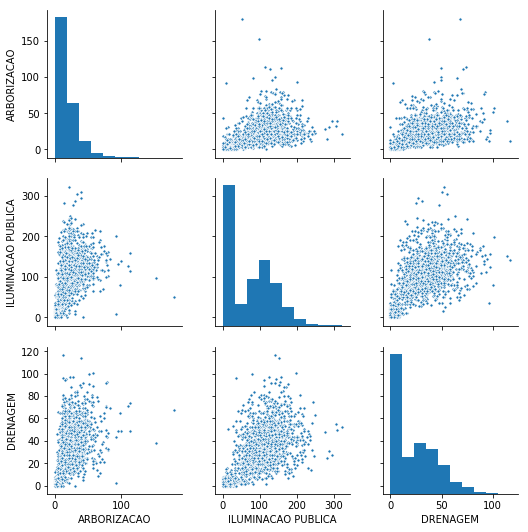

In [135]:
sns.pairplot(data_df[new_cols], plot_kws={"s": 10})

In [136]:
from scipy.stats import spearmanr

corr_values = spearmanr(data_df)
corr_df = pd.DataFrame(corr_values[0], columns=['INDICE'] + list(groups_df.columns))
corr_df.index = corr_df.columns

np.fill_diagonal(corr_df.values, 0)

new_cols = []
threshold = 0.7
cols = corr_df.columns.values
for i in range(cols.shape[0]):
    for j in range(i, cols.shape[0]):
        maximum = corr_df.iloc[i, j]
        if maximum >= threshold:
            new_cols.append(cols[i])

new_cols = list(set(new_cols))
data_corr = corr_df.loc[new_cols, new_cols]
np.fill_diagonal(data_corr.values, 0)

data_pvalue = pd.DataFrame(corr_values[1], columns=corr_df.columns)
data_pvalue.index = corr_df.columns
data_pvalue2 = data_pvalue.loc[new_cols, new_cols]

print('Tabela de correlações Spearman entre os grupos de serviços:')
display(data_corr)
print('\n\nTabela de p-values associada:')
display(data_pvalue2)

Tabela de correlações Spearman entre os grupos de serviços:


,LUMINARIAS,COLETA URBANA,DRENAGEM,LIMPEZA URBANA,ARBORIZACAO,ILUMINACAO PUBLICA,FISCALIZACAO URBANA
LUMINARIAS,0.000000,0.522926,0.725243,0.676017,0.754094,0.724183,0.681140
COLETA URBANA,0.522926,0.000000,0.685601,0.789209,0.622261,0.671388,0.622128
DRENAGEM,0.725243,0.685601,0.000000,0.814421,0.830478,0.835102,0.730295
LIMPEZA URBANA,0.676017,0.789209,0.814421,0.000000,0.757943,0.801561,0.760780
ARBORIZACAO,0.754094,0.622261,0.830478,0.757943,0.000000,0.828298,0.716829
ILUMINACAO PUBLICA,0.724183,0.671388,0.835102,0.801561,0.828298,0.000000,0.723038
FISCALIZACAO URBANA,0.681140,0.622128,0.730295,0.760780,0.716829,0.723038,0.000000




Tabela de p-values associada:


,LUMINARIAS,COLETA URBANA,DRENAGEM,LIMPEZA URBANA,ARBORIZACAO,ILUMINACAO PUBLICA,FISCALIZACAO URBANA
LUMINARIAS,0.000000e+00,8.433011e-176,0.0,0.0,0.000000e+00,0.0,0.000000e+00
COLETA URBANA,8.433011e-176,0.000000e+00,0.0,0.0,2.170268e-268,0.0,3.040655e-268
DRENAGEM,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00
LIMPEZA URBANA,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00
ARBORIZACAO,0.000000e+00,2.170268e-268,0.0,0.0,0.000000e+00,0.0,0.000000e+00
ILUMINACAO PUBLICA,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.000000e+00
FISCALIZACAO URBANA,0.000000e+00,3.040655e-268,0.0,0.0,0.000000e+00,0.0,0.000000e+00


In [137]:
args = corr_df['INDICE'].sort_values(ascending=False)[:10]
args

ARBORIZACAO           0.144089
DRENAGEM              0.101666
PAVIMENTACAO          0.056219
ESCADARIA             0.054217
MACRODRENAGEM         0.054047
TERRAPLENAGEM         0.049965
MANUT. URBANA         0.049766
POSTE                 0.044220
CALCADAS ARVORES      0.042654
ILUMINACAO PUBLICA    0.040743
Name: INDICE, dtype: float64

In [138]:
pvalues = data_pvalue['INDICE'][args.index]
pvalues

ARBORIZACAO           4.342639e-13
DRENAGEM              3.431590e-07
PAVIMENTACAO          4.892598e-03
ESCADARIA             6.654960e-03
MACRODRENAGEM         6.827429e-03
TERRAPLENAGEM         1.239949e-02
MANUT. URBANA         1.275289e-02
POSTE                 2.691559e-02
CALCADAS ARVORES      3.281650e-02
ILUMINACAO PUBLICA    4.149092e-02
Name: INDICE, dtype: float64

In [140]:
pd.DataFrame({'corr': args.values, 'pvalue':pvalues})

,corr,pvalue
ARBORIZACAO,0.144089,4.342639e-13
DRENAGEM,0.101666,3.431590e-07
PAVIMENTACAO,0.056219,4.892598e-03
ESCADARIA,0.054217,6.654960e-03
MACRODRENAGEM,0.054047,6.827429e-03
TERRAPLENAGEM,0.049965,1.239949e-02
MANUT. URBANA,0.049766,1.275289e-02
POSTE,0.044220,2.691559e-02
CALCADAS ARVORES,0.042654,3.281650e-02
ILUMINACAO PUBLICA,0.040743,4.149092e-02


## Análise dos dados pluviométrico com relação aos serviços

In [125]:
df_156.columns = ['GRUPOSERVICO_CODIGO', 'GRUPOSERVICO_DESCRICAO', 'SERVICO_CODIGO', 'SERVICO_DESCRICAO', 'LOGRADOURO', 'NUMERO', 'BAIRRO', 'RPA', 'DATA', 'SITUACAO', 'DATA_ULT_SITUACAO', 'ANO']
merged_df = pd.merge(left=df_156, right=df_plu, on='DATA')
groups_df = pd.get_dummies(merged_df['SERVICO_DESCRICAO'])
concat_df = pd.concat([merged_df, groups_df], axis=1)
final_df = concat_df[['DATA', 'INDICE'] + list(groups_df.columns)].groupby('DATA')
data_df = pd.concat([final_df['INDICE'].mean(), final_df[groups_df.columns].sum()], axis=1)

In [88]:
corr_df = data_df.corr()

np.fill_diagonal(corr_df.values, 0)

new_cols = []
threshold = 0.7
cols = corr_df.columns.values
for i in range(cols.shape[0]):
    for j in range(i, cols.shape[0]):
        maximum = corr_df.iloc[i, j]
        if maximum >= threshold:
            new_cols.append(cols[i])

new_cols = list(set(new_cols))
data_corr = corr_df.loc[new_cols, new_cols]
np.fill_diagonal(data_corr.values, 0)

print('Tabela de correlações Pearson entre os serviços:')
display(data_corr)

Tabela de correlações Pearson entre os serviços:


,CAPINACAO EM LOGRADOUROS,VELORIO POPULAR,SEPULT.EM COVA ADULTO,MANUT. EM LAMPADA APAGADA,SEPULT.EM JASIDUO
CAPINACAO EM LOGRADOUROS,0.000000,0.144050,0.140187,0.807819,0.119828
VELORIO POPULAR,0.144050,0.000000,0.938892,0.228168,0.586454
SEPULT.EM COVA ADULTO,0.140187,0.938892,0.000000,0.210657,0.576395
MANUT. EM LAMPADA APAGADA,0.807819,0.228168,0.210657,0.000000,0.193418
SEPULT.EM JASIDUO,0.119828,0.586454,0.576395,0.193418,0.000000


In [89]:
corr_df['INDICE'].sort_values(ascending=False)[:10]

QUEDA DE ARVORE                            0.217138
ERRADICACAO DE ARVORES                     0.132633
LIMP. DE GALERIAS,VALETAS,SARJETAS         0.109020
LIMPEZA DE CANALETAS                       0.108533
RECUPERACAO DE PAVIMENTO PARALELEPIPEDO    0.082306
LIMPEZA DE CANAL                           0.081049
VISTORIA DE ARVORES                        0.067434
REPOSICAO DESL. E RET. DE POSTE            0.066421
RECUP.DE CANALETAS DE DRENAGEM             0.059129
REMOCAO DE AREIA OU BARRO DE ENXURRADA     0.057319
Name: INDICE, dtype: float64

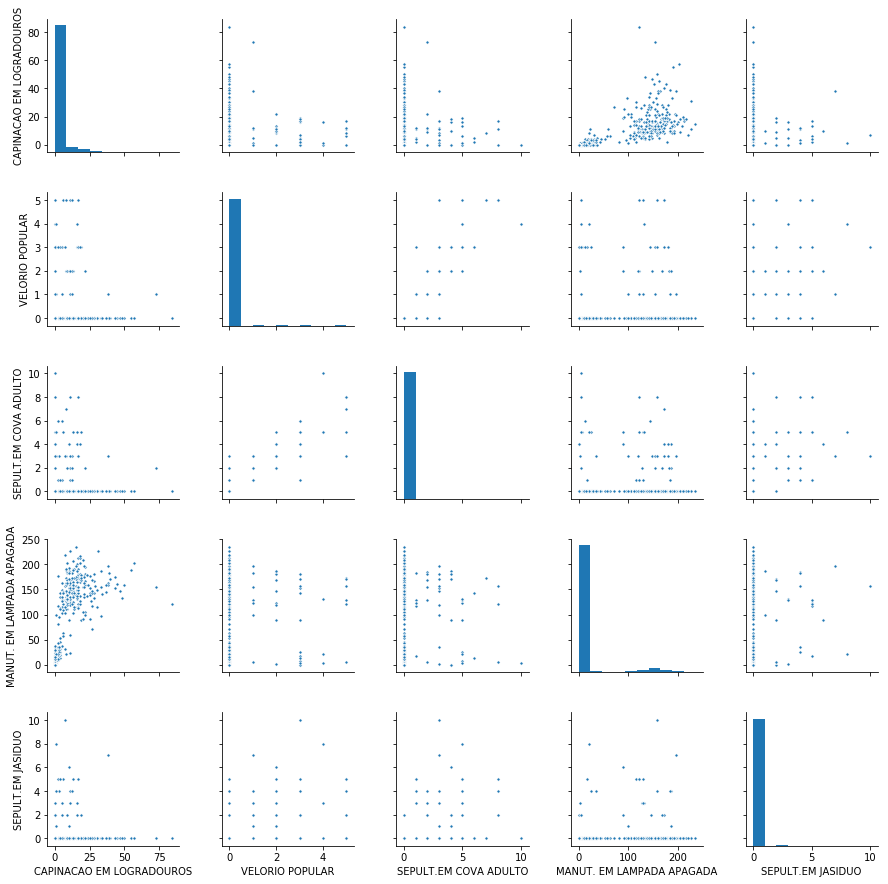

In [90]:
sns.pairplot(data_df[new_cols], plot_kws={"s": 10})

In [126]:
from scipy.stats import spearmanr

corr_values = spearmanr(data_df)
corr_df = pd.DataFrame(corr_values[0], columns=['INDICE'] + list(groups_df.columns))
corr_df.index = corr_df.columns

np.fill_diagonal(corr_df.values, 0)

new_cols = []
threshold = 0.8
cols = corr_df.columns.values
for i in range(cols.shape[0]):
    for j in range(i, cols.shape[0]):
        maximum = corr_df.iloc[i, j]
        if maximum >= threshold:
            new_cols.append(cols[i])

new_cols = list(set(new_cols))
data_corr = corr_df.loc[new_cols, new_cols]
np.fill_diagonal(data_corr.values, 0)

data_pvalue = pd.DataFrame(corr_values[1], columns=corr_df.columns)
data_pvalue.index = corr_df.columns
data_pvalue2 = data_pvalue.loc[new_cols, new_cols]

print('Tabela de correlações Spearman entre os grupos de serviços:')
display(data_corr)
print('\n\nTabela de p-values associada:')
display(data_pvalue2)

Tabela de correlações Spearman entre os grupos de serviços:


,CAPINACAO EM LOGRADOUROS,VELORIO POPULAR,SEPULT.EM COVA ADULTO,MANUT. EM LAMPADA APAGADA,SEPULT.EM JASIDUO
CAPINACAO EM LOGRADOUROS,0.000000,0.277267,0.291550,0.930586,0.236862
VELORIO POPULAR,0.277267,0.000000,0.963747,0.303432,0.704701
SEPULT.EM COVA ADULTO,0.291550,0.963747,0.000000,0.315600,0.768820
MANUT. EM LAMPADA APAGADA,0.930586,0.303432,0.315600,0.000000,0.254500
SEPULT.EM JASIDUO,0.236862,0.704701,0.768820,0.254500,0.000000




Tabela de p-values associada:


,CAPINACAO EM LOGRADOUROS,VELORIO POPULAR,SEPULT.EM COVA ADULTO,MANUT. EM LAMPADA APAGADA,SEPULT.EM JASIDUO
CAPINACAO EM LOGRADOUROS,0.000000e+00,1.984524e-45,2.972187e-50,0.000000e+00,2.855735e-33
VELORIO POPULAR,1.984524e-45,0.000000e+00,0.000000e+00,1.745497e-54,0.000000e+00
SEPULT.EM COVA ADULTO,2.972187e-50,0.000000e+00,0.000000e+00,4.998047e-59,0.000000e+00
MANUT. EM LAMPADA APAGADA,0.000000e+00,1.745497e-54,4.998047e-59,0.000000e+00,2.590545e-38
SEPULT.EM JASIDUO,2.855735e-33,0.000000e+00,0.000000e+00,2.590545e-38,0.000000e+00


In [127]:
args = corr_df['INDICE'].sort_values(ascending=False)[:10]
args

QUEDA DE ARVORE                            0.269340
RECUPERACAO DE PAVIMENTO PARALELEPIPEDO    0.123583
LIMP. DE GALERIAS,VALETAS,SARJETAS         0.119274
ERRADICACAO DE ARVORES                     0.116589
VISTORIA DE ARVORES                        0.115231
LIMPEZA DE CANALETAS                       0.078939
RECUP.DE CANALETAS DE DRENAGEM             0.075086
RECUP. DE ABATIMENTO GALERIA               0.073238
REPOSICAO DESL. E RET. DE POSTE            0.071965
REBAIXAMENTO COPAS DE ARVORES              0.069751
Name: INDICE, dtype: float64

In [128]:
pvalues = data_pvalue['INDICE'][args.index]
pvalues

QUEDA DE ARVORE                            7.148800e-43
RECUPERACAO DE PAVIMENTO PARALELEPIPEDO    5.477141e-10
LIMP. DE GALERIAS,VALETAS,SARJETAS         2.139068e-09
ERRADICACAO DE ARVORES                     4.882190e-09
VISTORIA DE ARVORES                        7.357812e-09
LIMPEZA DE CANALETAS                       7.675837e-05
RECUP.DE CANALETAS DE DRENAGEM             1.694248e-04
RECUP. DE ABATIMENTO GALERIA               2.445284e-04
REPOSICAO DESL. E RET. DE POSTE            3.133254e-04
REBAIXAMENTO COPAS DE ARVORES              4.779349e-04
Name: INDICE, dtype: float64

In [130]:
pd.DataFrame({'corr': args.values, 'pvalue':pvalues}).to_csv('../../corr_indice_spearman_types.csv')